# **Toronto Crime Predictions**

In [1]:
# Dependencies
import requests
import json
import pprint #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


---

## **Retrieve Data from API**

In [2]:
# Initialize the base URL and the initial parameters
base_url = 'https://services.arcgis.com/S9th0jAJ7bqgIRjw/ArcGIS/rest/services/Major_Crime_Indicators_Open_Data/FeatureServer/0/query'
params = {
    'where': 'OCC_YEAR<=2024 AND OCC_YEAR>=2021',
    'outFields': '*',
    'resultRecordCount': 2000,
    'resultOffset': 0,
    'f': 'geojson'
}
# Create an empty list to store all the results
crime_json_array = []
# Start the loop to paginate through the results
while True:
    response = requests.get(base_url, params=params).json()
    # Add the current batch of features to the list
    crime_json_array.extend(response['features'])
    # Check if 'exceededTransferLimit' is True, which means there are more records
    if 'properties' in response and response['properties'].get('exceededTransferLimit', False):
        # Increment the offset to get the next batch of records
        params['resultOffset'] += params['resultRecordCount']
    else:
        # Exit the loop if there are no more records to retrieve
        break

In [3]:
# View the raw JSON data
crime_json_array

[{'type': 'Feature',
  'id': 246675,
  'geometry': {'type': 'Point',
   'coordinates': [-79.425761926, 43.6817690130001]},
  'properties': {'OBJECTID': 246675,
   'EVENT_UNIQUE_ID': 'GO-20213605',
   'REPORT_DATE': 1609477200000,
   'OCC_DATE': 1609477200000,
   'REPORT_YEAR': 2021,
   'REPORT_MONTH': 'January',
   'REPORT_DAY': 1,
   'REPORT_DOY': 1,
   'REPORT_DOW': 'Friday    ',
   'REPORT_HOUR': 16,
   'OCC_YEAR': 2021,
   'OCC_MONTH': 'January',
   'OCC_DAY': 1,
   'OCC_DOY': 1,
   'OCC_DOW': 'Friday    ',
   'OCC_HOUR': 16,
   'DIVISION': 'D13',
   'LOCATION_TYPE': 'Parking Lots (Apt., Commercial Or Non-Commercial)',
   'PREMISES_TYPE': 'Outside',
   'UCR_CODE': 2135,
   'UCR_EXT': 210,
   'OFFENCE': 'Theft Of Motor Vehicle',
   'MCI_CATEGORY': 'Auto Theft',
   'HOOD_158': '094',
   'NEIGHBOURHOOD_158': 'Wychwood (94)',
   'HOOD_140': '094',
   'NEIGHBOURHOOD_140': 'Wychwood (94)',
   'LONG_WGS84': -79.42576192637651,
   'LAT_WGS84': 43.68176901263976}},
 {'type': 'Feature',
  'i

In [4]:
def arrange_crime_json_array(crime):
    """ Function for filtering out the API query metdata, and getting a JSON list of just the crime data"""
    crime_case = crime['properties']
    return crime_case

In [5]:
# Using a list comprehension to apply the function for each entry in the intial crime JSON array.
crime_json_list = [crime['properties'] for crime in crime_json_array]
crime_json_list

[{'OBJECTID': 246675,
  'EVENT_UNIQUE_ID': 'GO-20213605',
  'REPORT_DATE': 1609477200000,
  'OCC_DATE': 1609477200000,
  'REPORT_YEAR': 2021,
  'REPORT_MONTH': 'January',
  'REPORT_DAY': 1,
  'REPORT_DOY': 1,
  'REPORT_DOW': 'Friday    ',
  'REPORT_HOUR': 16,
  'OCC_YEAR': 2021,
  'OCC_MONTH': 'January',
  'OCC_DAY': 1,
  'OCC_DOY': 1,
  'OCC_DOW': 'Friday    ',
  'OCC_HOUR': 16,
  'DIVISION': 'D13',
  'LOCATION_TYPE': 'Parking Lots (Apt., Commercial Or Non-Commercial)',
  'PREMISES_TYPE': 'Outside',
  'UCR_CODE': 2135,
  'UCR_EXT': 210,
  'OFFENCE': 'Theft Of Motor Vehicle',
  'MCI_CATEGORY': 'Auto Theft',
  'HOOD_158': '094',
  'NEIGHBOURHOOD_158': 'Wychwood (94)',
  'HOOD_140': '094',
  'NEIGHBOURHOOD_140': 'Wychwood (94)',
  'LONG_WGS84': -79.42576192637651,
  'LAT_WGS84': 43.68176901263976},
 {'OBJECTID': 246676,
  'EVENT_UNIQUE_ID': 'GO-20213400',
  'REPORT_DATE': 1609477200000,
  'OCC_DATE': 1609477200000,
  'REPORT_YEAR': 2021,
  'REPORT_MONTH': 'January',
  'REPORT_DAY': 1,
  

In [6]:
# Convert the JSON array into a Dataframe
crime_data_original = pd.DataFrame(crime_json_list)
crime_data_original

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,246675,GO-20213605,1609477200000,1609477200000,2021,January,1,1,Friday,16,...,2135,210,Theft Of Motor Vehicle,Auto Theft,094,Wychwood (94),094,Wychwood (94),-79.425762,43.681769
1,246676,GO-20213400,1609477200000,1609477200000,2021,January,1,1,Friday,16,...,2135,210,Theft Of Motor Vehicle,Auto Theft,NSA,NSA,NSA,NSA,0.000000,0.000000
2,246677,GO-20211123,1609477200000,1609477200000,2021,January,1,1,Friday,7,...,2135,210,Theft Of Motor Vehicle,Auto Theft,031,Yorkdale-Glen Park (31),031,Yorkdale-Glen Park (31),-79.460110,43.721013
3,246678,GO-2021445,1609477200000,1609477200000,2021,January,1,1,Friday,1,...,2135,210,Theft Of Motor Vehicle,Auto Theft,151,Yonge-Doris (151),051,Willowdale East (51),-79.415293,43.778743
4,246679,GO-20213400,1609477200000,1609477200000,2021,January,1,1,Friday,16,...,2135,210,Theft Of Motor Vehicle,Auto Theft,NSA,NSA,NSA,NSA,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147546,396731,GO-20241427047,1719723600000,1719637200000,2024,June,30,182,Sunday,16,...,1430,100,Assault,Assault,071,Cabbagetown-South St.James Town (71),071,Cabbagetown-South St.James Town (71),-79.373043,43.663195
147547,396732,GO-20241427869,1719723600000,1719723600000,2024,June,30,182,Sunday,18,...,2133,200,Theft Over - Shoplifting,Theft Over,027,York University Heights (27),027,York University Heights (27),-79.464942,43.759469
147548,396733,GO-20241423116,1719723600000,1719637200000,2024,June,30,182,Sunday,2,...,1450,120,Discharge Firearm With Intent,Assault,144,Morningside Heights (144),131,Rouge (131),-79.248477,43.837237
147549,396734,GO-20241426669,1719723600000,1718859600000,2024,June,30,182,Sunday,15,...,2132,200,Theft From Motor Vehicle Over,Theft Over,160,Mimico-Queensway (160),017,Mimico (includes Humber Bay Shores) (17),-79.521053,43.616490




---



## **Preprocess the Data**

In [7]:
# Get all the column names in crime_data_original
crime_data_original.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84'],
      dtype='object')

In [8]:
# Change the value of 'NSA' in the HOOD_158 column to 0 and then convert the column values to integers
crime_data_original['HOOD_158'] = crime_data_original['HOOD_158'].replace('NSA', 0)
crime_data_original['HOOD_158'] = crime_data_original['HOOD_158'].astype(int)
crime_data_original

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,246675,GO-20213605,1609477200000,1609477200000,2021,January,1,1,Friday,16,...,2135,210,Theft Of Motor Vehicle,Auto Theft,94,Wychwood (94),094,Wychwood (94),-79.425762,43.681769
1,246676,GO-20213400,1609477200000,1609477200000,2021,January,1,1,Friday,16,...,2135,210,Theft Of Motor Vehicle,Auto Theft,0,NSA,NSA,NSA,0.000000,0.000000
2,246677,GO-20211123,1609477200000,1609477200000,2021,January,1,1,Friday,7,...,2135,210,Theft Of Motor Vehicle,Auto Theft,31,Yorkdale-Glen Park (31),031,Yorkdale-Glen Park (31),-79.460110,43.721013
3,246678,GO-2021445,1609477200000,1609477200000,2021,January,1,1,Friday,1,...,2135,210,Theft Of Motor Vehicle,Auto Theft,151,Yonge-Doris (151),051,Willowdale East (51),-79.415293,43.778743
4,246679,GO-20213400,1609477200000,1609477200000,2021,January,1,1,Friday,16,...,2135,210,Theft Of Motor Vehicle,Auto Theft,0,NSA,NSA,NSA,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147546,396731,GO-20241427047,1719723600000,1719637200000,2024,June,30,182,Sunday,16,...,1430,100,Assault,Assault,71,Cabbagetown-South St.James Town (71),071,Cabbagetown-South St.James Town (71),-79.373043,43.663195
147547,396732,GO-20241427869,1719723600000,1719723600000,2024,June,30,182,Sunday,18,...,2133,200,Theft Over - Shoplifting,Theft Over,27,York University Heights (27),027,York University Heights (27),-79.464942,43.759469
147548,396733,GO-20241423116,1719723600000,1719637200000,2024,June,30,182,Sunday,2,...,1450,120,Discharge Firearm With Intent,Assault,144,Morningside Heights (144),131,Rouge (131),-79.248477,43.837237
147549,396734,GO-20241426669,1719723600000,1718859600000,2024,June,30,182,Sunday,15,...,2132,200,Theft From Motor Vehicle Over,Theft Over,160,Mimico-Queensway (160),017,Mimico (includes Humber Bay Shores) (17),-79.521053,43.616490


In [9]:
# Collect only the necessary columns for the analysis
crime_pd = crime_data_original[['EVENT_UNIQUE_ID', 'NEIGHBOURHOOD_158', 'HOOD_158', 'LAT_WGS84', 'LONG_WGS84', 'PREMISES_TYPE', 'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_HOUR', 'MCI_CATEGORY']]
crime_pd


,EVENT_UNIQUE_ID,NEIGHBOURHOOD_158,HOOD_158,LAT_WGS84,LONG_WGS84,PREMISES_TYPE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_HOUR,MCI_CATEGORY
0,GO-20213605,Wychwood (94),94,43.681769,-79.425762,Outside,1609477200000,2021,January,1,16,Auto Theft
1,GO-20213400,NSA,0,0.000000,0.000000,Commercial,1609477200000,2021,January,1,4,Auto Theft
2,GO-20211123,Yorkdale-Glen Park (31),31,43.721013,-79.460110,Other,1609477200000,2021,January,1,4,Auto Theft
3,GO-2021445,Yonge-Doris (151),151,43.778743,-79.415293,Other,1609477200000,2021,January,1,1,Auto Theft
4,GO-20213400,NSA,0,0.000000,0.000000,Commercial,1609477200000,2021,January,1,4,Auto Theft
...,...,...,...,...,...,...,...,...,...,...,...,...
147546,GO-20241427047,Cabbagetown-South St.James Town (71),71,43.663195,-79.373043,Apartment,1719637200000,2024,June,29,23,Assault
147547,GO-20241427869,York University Heights (27),27,43.759469,-79.464942,Commercial,1719723600000,2024,June,30,18,Theft Over
147548,GO-20241423116,Morningside Heights (144),144,43.837237,-79.248477,Outside,1719637200000,2024,June,29,21,Assault
147549,GO-20241426669,Mimico-Queensway (160),160,43.616490,-79.521053,Outside,1718859600000,2024,June,20,13,Theft Over


In [10]:
# Group the values by EVENT_UNIQUE_ID and get the first value for all the columns, except for Assault, Auto Theft, Break and Enter, Robbery, Theft Over
crime_first_group = crime_pd.groupby('EVENT_UNIQUE_ID')[["NEIGHBOURHOOD_158", "HOOD_158", "LAT_WGS84", "LONG_WGS84", "PREMISES_TYPE", "OCC_DATE", "OCC_YEAR", "OCC_MONTH", "OCC_DAY", "OCC_HOUR"]].first()
crime_first_group

,NEIGHBOURHOOD_158,HOOD_158,LAT_WGS84,LONG_WGS84,PREMISES_TYPE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_HOUR
EVENT_UNIQUE_ID,,,,,,,,,,
GO-20211000033,West Queen West (162),162,43.646286,-79.408568,Commercial,1622264400000,2021,May,29,21
GO-2021100004,Morningside Heights (144),144,43.807252,-79.162903,Outside,1610773200000,2021,January,16,17
GO-20211000054,Moss Park (73),73,43.657067,-79.374531,Apartment,1622264400000,2021,May,29,22
GO-20211000193,Fort York-Liberty Village (163),163,43.636618,-79.399704,Apartment,1622264400000,2021,May,29,23
GO-20211000248,Eglinton East (138),138,43.737099,-79.246230,Outside,1622264400000,2021,May,29,21
...,...,...,...,...,...,...,...,...,...,...
GO-20249997,Junction-Wallace Emerson (171),171,43.668917,-79.442637,Outside,1704085200000,2024,January,1,18
GO-202499972,Edenbridge-Humber Valley (9),9,43.672705,-79.522472,House,1705208400000,2024,January,14,3
GO-2024999786,Flemingdon Park (44),44,43.718727,-79.334948,Apartment,1714539600000,2024,May,1,0


In [11]:
# Encode the MCI_CATEGORY column using get_dummies
crime_category_encoded = pd.get_dummies(crime_pd['MCI_CATEGORY']).astype(int)
crime_category_encoded


,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
147546,1,0,0,0,0
147547,0,0,0,0,1
147548,1,0,0,0,0
147549,0,0,0,0,1


In [12]:
# Add the encoded columns back into the datframe
crime_pd_encoded = pd.concat([crime_pd, crime_category_encoded], axis=1)
# crime_pd_encoded = crime_pd.drop(['MCI_CATEGORY'], axis=1) # Drop the original MCI_CATEGORY column
crime_pd_encoded

,EVENT_UNIQUE_ID,NEIGHBOURHOOD_158,HOOD_158,LAT_WGS84,LONG_WGS84,PREMISES_TYPE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_HOUR,MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,GO-20213605,Wychwood (94),94,43.681769,-79.425762,Outside,1609477200000,2021,January,1,16,Auto Theft,0,1,0,0,0
1,GO-20213400,NSA,0,0.000000,0.000000,Commercial,1609477200000,2021,January,1,4,Auto Theft,0,1,0,0,0
2,GO-20211123,Yorkdale-Glen Park (31),31,43.721013,-79.460110,Other,1609477200000,2021,January,1,4,Auto Theft,0,1,0,0,0
3,GO-2021445,Yonge-Doris (151),151,43.778743,-79.415293,Other,1609477200000,2021,January,1,1,Auto Theft,0,1,0,0,0
4,GO-20213400,NSA,0,0.000000,0.000000,Commercial,1609477200000,2021,January,1,4,Auto Theft,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147546,GO-20241427047,Cabbagetown-South St.James Town (71),71,43.663195,-79.373043,Apartment,1719637200000,2024,June,29,23,Assault,1,0,0,0,0
147547,GO-20241427869,York University Heights (27),27,43.759469,-79.464942,Commercial,1719723600000,2024,June,30,18,Theft Over,0,0,0,0,1
147548,GO-20241423116,Morningside Heights (144),144,43.837237,-79.248477,Outside,1719637200000,2024,June,29,21,Assault,1,0,0,0,0
147549,GO-20241426669,Mimico-Queensway (160),160,43.616490,-79.521053,Outside,1718859600000,2024,June,20,13,Theft Over,0,0,0,0,1


In [13]:
# Group the values by EVENT_UNIQUE_ID and get the first value for all the columns, except for Assault, Auto Theft, Break and Enter, Robbery, Theft Over
crime_first_group = crime_pd_encoded.groupby('EVENT_UNIQUE_ID')[["NEIGHBOURHOOD_158", "HOOD_158", "LAT_WGS84", "LONG_WGS84", "PREMISES_TYPE", "OCC_DATE", "OCC_YEAR", "OCC_MONTH", "OCC_DAY", "OCC_HOUR","MCI_CATEGORY"]].first()
crime_first_group

,NEIGHBOURHOOD_158,HOOD_158,LAT_WGS84,LONG_WGS84,PREMISES_TYPE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_HOUR,MCI_CATEGORY
EVENT_UNIQUE_ID,,,,,,,,,,,
GO-20211000033,West Queen West (162),162,43.646286,-79.408568,Commercial,1622264400000,2021,May,29,21,Break and Enter
GO-2021100004,Morningside Heights (144),144,43.807252,-79.162903,Outside,1610773200000,2021,January,16,17,Auto Theft
GO-20211000054,Moss Park (73),73,43.657067,-79.374531,Apartment,1622264400000,2021,May,29,22,Assault
GO-20211000193,Fort York-Liberty Village (163),163,43.636618,-79.399704,Apartment,1622264400000,2021,May,29,23,Assault
GO-20211000248,Eglinton East (138),138,43.737099,-79.246230,Outside,1622264400000,2021,May,29,21,Assault
...,...,...,...,...,...,...,...,...,...,...,...
GO-20249997,Junction-Wallace Emerson (171),171,43.668917,-79.442637,Outside,1704085200000,2024,January,1,18,Auto Theft
GO-202499972,Edenbridge-Humber Valley (9),9,43.672705,-79.522472,House,1705208400000,2024,January,14,3,Auto Theft
GO-2024999786,Flemingdon Park (44),44,43.718727,-79.334948,Apartment,1714539600000,2024,May,1,0,Assault


In [14]:
# Group the MCI_CATEGORY values by EVENT_UNIQUE_ID and get the maximum value.
crime_max_group = crime_pd_encoded.groupby('EVENT_UNIQUE_ID')[["Assault", "Auto Theft", "Break and Enter", "Robbery", "Theft Over"]].max()
crime_max_group

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
EVENT_UNIQUE_ID,,,,,
GO-20211000033,0,0,1,0,0
GO-2021100004,0,1,0,0,0
GO-20211000054,1,0,0,0,0
GO-20211000193,1,0,0,0,0
GO-20211000248,1,0,0,0,0
...,...,...,...,...,...
GO-20249997,0,1,0,0,0
GO-202499972,0,1,0,0,0
GO-2024999786,1,0,0,0,0


In [15]:
# Concatenate the two groups together into one Dataframe and reset the index so that EVENT_UNIQUE_ID is not the index.
crime_groups_joined = pd.concat([crime_first_group, crime_max_group], axis=1)
crime_groups_joined = crime_groups_joined.reset_index()
crime_groups_joined

,EVENT_UNIQUE_ID,NEIGHBOURHOOD_158,HOOD_158,LAT_WGS84,LONG_WGS84,PREMISES_TYPE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_HOUR,MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,GO-20211000033,West Queen West (162),162,43.646286,-79.408568,Commercial,1622264400000,2021,May,29,21,Break and Enter,0,0,1,0,0
1,GO-2021100004,Morningside Heights (144),144,43.807252,-79.162903,Outside,1610773200000,2021,January,16,17,Auto Theft,0,1,0,0,0
2,GO-20211000054,Moss Park (73),73,43.657067,-79.374531,Apartment,1622264400000,2021,May,29,22,Assault,1,0,0,0,0
3,GO-20211000193,Fort York-Liberty Village (163),163,43.636618,-79.399704,Apartment,1622264400000,2021,May,29,23,Assault,1,0,0,0,0
4,GO-20211000248,Eglinton East (138),138,43.737099,-79.246230,Outside,1622264400000,2021,May,29,21,Assault,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129212,GO-20249997,Junction-Wallace Emerson (171),171,43.668917,-79.442637,Outside,1704085200000,2024,January,1,18,Auto Theft,0,1,0,0,0
129213,GO-202499972,Edenbridge-Humber Valley (9),9,43.672705,-79.522472,House,1705208400000,2024,January,14,3,Auto Theft,0,1,0,0,0
129214,GO-2024999786,Flemingdon Park (44),44,43.718727,-79.334948,Apartment,1714539600000,2024,May,1,0,Assault,1,0,0,0,0
129215,GO-2024999795,Oakridge (121),121,43.691225,-79.288346,Commercial,1715230800000,2024,May,9,13,Assault,1,0,0,0,0


---

In [16]:
# Create a Total_Count column in the crime_groups_joined dataframe
crime_groups_joined['Total_Count'] = crime_groups_joined.iloc[:, 12:].sum(axis=1)
crime_groups_joined

,EVENT_UNIQUE_ID,NEIGHBOURHOOD_158,HOOD_158,LAT_WGS84,LONG_WGS84,PREMISES_TYPE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_HOUR,MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total_Count
0,GO-20211000033,West Queen West (162),162,43.646286,-79.408568,Commercial,1622264400000,2021,May,29,21,Break and Enter,0,0,1,0,0,1
1,GO-2021100004,Morningside Heights (144),144,43.807252,-79.162903,Outside,1610773200000,2021,January,16,17,Auto Theft,0,1,0,0,0,1
2,GO-20211000054,Moss Park (73),73,43.657067,-79.374531,Apartment,1622264400000,2021,May,29,22,Assault,1,0,0,0,0,1
3,GO-20211000193,Fort York-Liberty Village (163),163,43.636618,-79.399704,Apartment,1622264400000,2021,May,29,23,Assault,1,0,0,0,0,1
4,GO-20211000248,Eglinton East (138),138,43.737099,-79.246230,Outside,1622264400000,2021,May,29,21,Assault,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129212,GO-20249997,Junction-Wallace Emerson (171),171,43.668917,-79.442637,Outside,1704085200000,2024,January,1,18,Auto Theft,0,1,0,0,0,1
129213,GO-202499972,Edenbridge-Humber Valley (9),9,43.672705,-79.522472,House,1705208400000,2024,January,14,3,Auto Theft,0,1,0,0,0,1
129214,GO-2024999786,Flemingdon Park (44),44,43.718727,-79.334948,Apartment,1714539600000,2024,May,1,0,Assault,1,0,0,0,0,1
129215,GO-2024999795,Oakridge (121),121,43.691225,-79.288346,Commercial,1715230800000,2024,May,9,13,Assault,1,0,0,0,0,1


In [17]:
# Group the crime_groups_joined dataframe by neighbourhood, occ_year, occ_month,
# get the count of the rows aggregated to each group, and place those values in the Total_Count column.
crime_totals_by_month_year_hood = crime_groups_joined.groupby(['HOOD_158', 'OCC_YEAR', 'OCC_MONTH','MCI_CATEGORY'])[['Total_Count']].count()
crime_totals_by_month_year_hood = crime_totals_by_month_year_hood.reset_index()
crime_totals_by_month_year_hood

,HOOD_158,OCC_YEAR,OCC_MONTH,MCI_CATEGORY,Total_Count
0,0,2021,April,Assault,16
1,0,2021,April,Auto Theft,1
2,0,2021,April,Break and Enter,3
3,0,2021,April,Robbery,3
4,0,2021,April,Theft Over,3
...,...,...,...,...,...
24758,174,2024,March,Auto Theft,1
24759,174,2024,May,Assault,8
24760,174,2024,May,Auto Theft,1
24761,174,2024,May,Break and Enter,2


In [18]:
# Group the crime_groups_joined dataframe by neighbourhood, occ_year, occ_month and get the sum of assaults, auto theft, break and enter, robbery, and theft over.
crime_types_by_month_year_hood = crime_groups_joined.groupby(['HOOD_158', 'OCC_YEAR', 'OCC_MONTH','MCI_CATEGORY'])[["Assault", "Auto Theft", "Break and Enter", "Robbery", "Theft Over"]].sum()
crime_types_by_month_year_hood = crime_types_by_month_year_hood.reset_index()
# Concatenate crime_totals_by_month_year_hood and crime_types_by_month_year_hood intot a single dataframe
crime_by_month_year_hood = pd.concat([crime_types_by_month_year_hood, crime_totals_by_month_year_hood['Total_Count']], axis=1)
crime_by_month_year_hood.sort_values(by=['Total_Count'])

,HOOD_158,OCC_YEAR,OCC_MONTH,MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total_Count
24762,174,2024,May,Theft Over,0,0,0,0,1,1
17049,123,2021,November,Robbery,0,0,0,1,0,1
6670,46,2023,September,Theft Over,0,0,0,0,1,1
6669,46,2023,September,Robbery,0,0,0,1,0,1
6668,46,2023,September,Break and Enter,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
307,1,2022,October,Auto Theft,0,70,0,0,0,70
317,1,2023,April,Auto Theft,0,75,0,0,0,75
347,1,2023,June,Auto Theft,0,77,1,0,0,77
352,1,2023,March,Auto Theft,0,83,0,0,0,83


In [19]:
# Show all the rows where HOOD_158 has a value of 0
crime_by_month_year_hood.loc[crime_by_month_year_hood['HOOD_158'] == 0, :]

,HOOD_158,OCC_YEAR,OCC_MONTH,MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total_Count
0,0,2021,April,Assault,16,0,0,0,0,16
1,0,2021,April,Auto Theft,0,1,0,0,0,1
2,0,2021,April,Break and Enter,0,0,3,0,0,3
3,0,2021,April,Robbery,0,0,0,3,0,3
4,0,2021,April,Theft Over,0,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...
192,0,2024,May,Assault,17,0,0,0,0,17
193,0,2024,May,Auto Theft,0,12,0,1,0,12
194,0,2024,May,Break and Enter,0,0,4,0,0,4
195,0,2024,May,Robbery,0,0,0,1,0,1


In [20]:
# Filter out the rows where the column HOOD_158 has a value of 0
crime_by_month_year_hood = crime_by_month_year_hood.loc[crime_by_month_year_hood['HOOD_158'] != 0, :]
crime_by_month_year_hood = crime_by_month_year_hood.reset_index(drop=True)
crime_by_month_year_hood

,HOOD_158,OCC_YEAR,OCC_MONTH,MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total_Count
0,1,2021,April,Assault,11,0,0,0,0,11
1,1,2021,April,Auto Theft,0,31,0,0,0,31
2,1,2021,April,Break and Enter,0,0,4,0,0,4
3,1,2021,April,Robbery,0,0,0,2,0,2
4,1,2021,April,Theft Over,0,0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...
24561,174,2024,March,Auto Theft,0,1,0,0,0,1
24562,174,2024,May,Assault,8,0,0,0,0,8
24563,174,2024,May,Auto Theft,0,1,0,0,0,1
24564,174,2024,May,Break and Enter,0,0,2,0,0,2


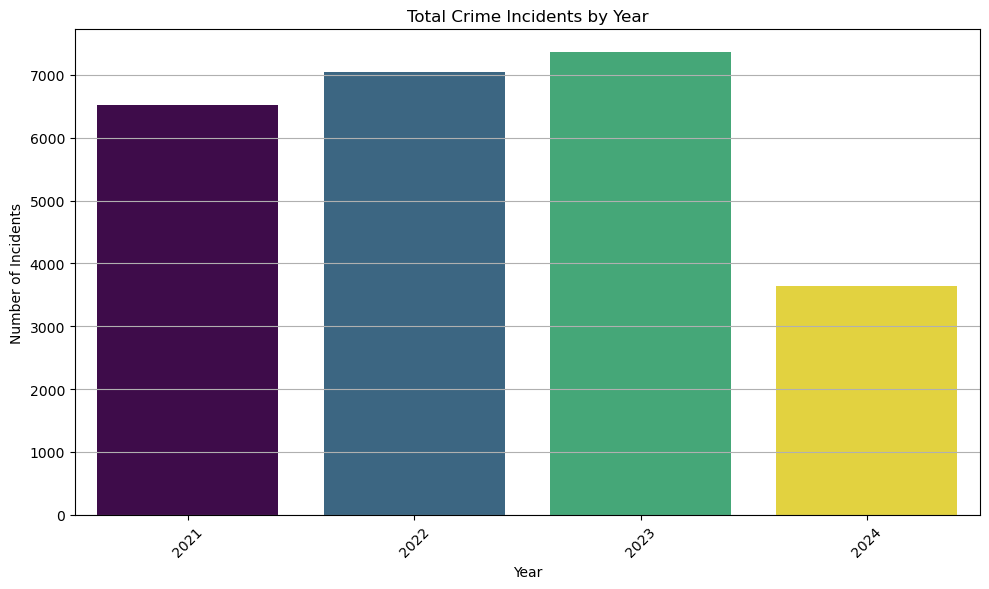

In [21]:
# Aggregate the data by year
crime_by_year = crime_by_month_year_hood.groupby('OCC_YEAR').size().reset_index(name='Incident_Count')

# Plotting the total crime incidents by year
plt.figure(figsize=(10, 6))
sns.barplot(data=crime_by_year, x='OCC_YEAR', y='Incident_Count', hue='OCC_YEAR', palette='viridis', legend=False)

plt.title('Total Crime Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [22]:
# Group the data by year and crime category, and get the count
crime_by_year_category = crime_by_month_year_hood.groupby(['OCC_YEAR', 'MCI_CATEGORY']).size().unstack(fill_value=0)

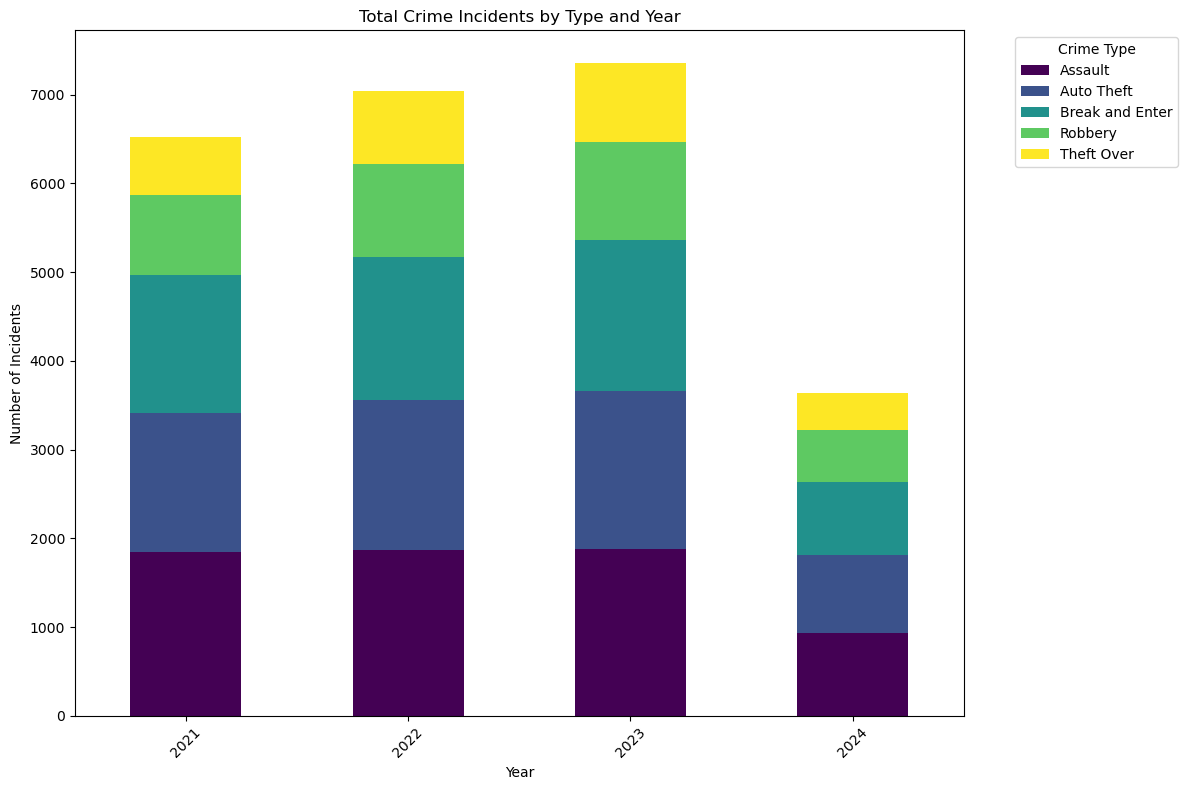

In [23]:
# Plotting the stacked bar chart
crime_by_year_category.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Total Crime Incidents by Type and Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.tight_layout()
plt.show()